In [1]:
import sys
from sys import path
from os import getcwd
import pickle
import numpy as np
import pandas as pd
from statistics import mode
import os
from PIL import ImageColor
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import extcolors
from colormap import rgb2hex

In [2]:
def pix_fruitID(data, model_path):
    # load model
    loaded_model = pickle.load(open(model_path, 'rb'))
    print(mode(loaded_model.predict(data)))
    
    return 

def hex_to_rgb(data):
    df = data
    for i in range(0, len(data)):
        data.hex_code[i] = list(ImageColor.getcolor(data.hex_code[i], "RGB"))
        
    data = pd.DataFrame(data['hex_code'].to_list(), columns=['r','g', 'b'])
    data = pd.concat([df, data], axis=1) 
    data = data.drop('hex_code', axis=1)
    
    return data

def build_colors_df(colors):
    colors_list = str(colors).replace('([(', '').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_list]
    df_percentage = [i.split('), ')[1].replace(')', '') for i in colors_list]
    df_hex = [rgb2hex(int(i.split(', ')[0].replace('(', '')),
                      int(i.split(', ')[1]),
                      int(i.split(', ')[2].replace(')', ''))) for i in df_rgb]
    return pd.DataFrame(zip(df_hex, df_percentage), columns=['hex_code', 'total_pixels'])


class ColorPalette:
    def __init__(self, image):
        self.image = image
        colors = extcolors.extract_from_path(self.image, tolerance=12, limit=12)
        self.colors = build_colors_df(colors)
        
def get_data(path):
    palette = ColorPalette(image=path)
    print(palette.colors)    
    
    return palette.colors

def fruitID_model(img_path, model):
    model = tf.keras.models.load_model(model)
    img = image.load_img(img_path ,target_size = (256, 256, 3))
    plt.imshow(img)
    plt.show()
    print(' ')
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    pred = model.predict(images)
    val = pred.argmax()
    
    if(val ==0):
        print("Fresh Apple")
    elif(val == 1):
        print("Fresh Banana")
    elif(val == 2):
        print("Fresh Orange")
    elif(val == 3):
        print("Rotten Apple")
    elif(val == 4):
        print("Rotten Banana")
    elif(val == 5):
        print("Rotten Orange")
    else:
        print("Fruit not in category")

def testing_models(img_path, img_class_model, pix_class_model):
    print("Classification from Image:")
    fruitID_model(img_path, img_class_model)
    print(' ')
    print("Image hex_code palette:")
    df = get_data(img_path)
    print(' ')
    df = hex_to_rgb(df)
    print("Classification from Hexcode:")
    pix_fruitID(df, pix_class_model)
    
    return

In [3]:
img_model = r'C:\Users\623285\fruit-condition-application\assets\fruit_classification.h5'
pix_model1 = r'C:\Users\623285\fruit-condition-application\assets\fruit_classification.pkl' # fresh *fruit name* vs rotten *fruit name*
pix_model2 = r'C:\Users\623285\fruit-condition-application\assets\fruit_classification2.pkl' # fresh vs rotten output

banana = r'C:\Users\623285\fruit-condition-application\test\banana.jpg'
apple = r'C:\Users\623285\fruit-condition-application\test\apple.png'

Classification from Image:


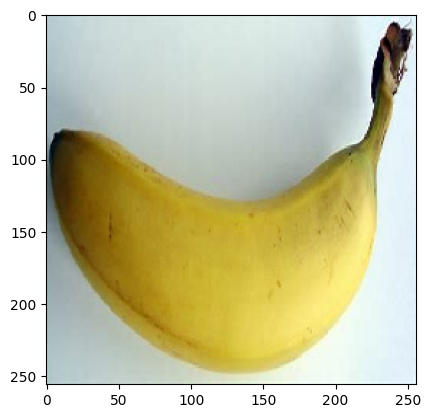

 
1/1 [==============================] - 0s 403ms/step
Fresh Banana
 
Image hex_code palette:
   hex_code total_pixels
0   #E4F3FA        29778
1   #CAD5CF        25047
2   #D5BE3E        16885
3   #B09522         8453
4   #9CAFB6         4653
5   #FDF07E         3950
6   #775607         3878
7   #493007         1527
8   #97760D         1448
9   #D5BF5C         1269
10  #B2A149         1177
 
Classification from Hexcode:
Fresh Banana


In [4]:
testing_models(banana, img_model, pix_model1)

Classification from Image:


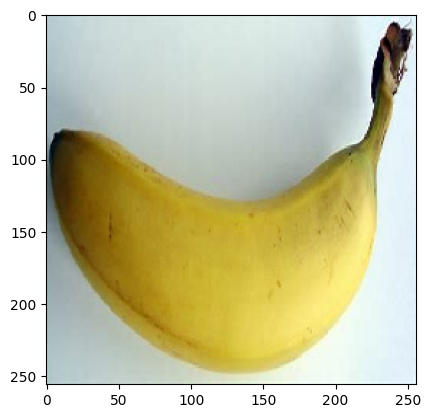

 
1/1 [==============================] - 0s 393ms/step
Fresh Banana
 
Image hex_code palette:
   hex_code total_pixels
0   #E4F3FA        29778
1   #CAD5CF        25047
2   #D5BE3E        16885
3   #B09522         8453
4   #9CAFB6         4653
5   #FDF07E         3950
6   #775607         3878
7   #493007         1527
8   #97760D         1448
9   #D5BF5C         1269
10  #B2A149         1177
 
Classification from Hexcode:
Rotten


In [5]:
testing_models(banana, img_model, pix_model2)

Classification from Image:


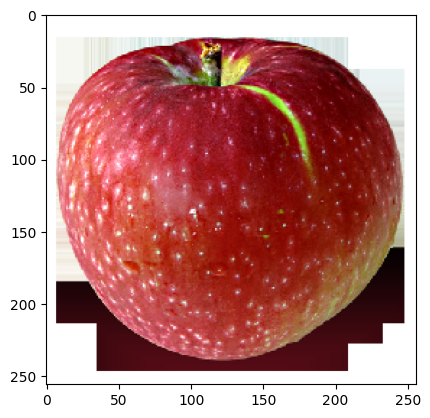

 
1/1 [==============================] - 0s 382ms/step
Fresh Apple
 
Image hex_code palette:
   hex_code total_pixels
0   #890C04        30219
1   #BF4745        15825
2   #991926        13317
3   #5D0000        12445
4   #520B14        10036
5   #BF5D62         5151
6   #E0636A         4829
7   #935B3E         4109
8   #A22F44         3603
9   #DF4F4B         3305
10  #36070D         2997
 
Classification from Hexcode:
Fresh Apple


In [6]:
testing_models(apple, img_model, pix_model1)

Classification from Image:


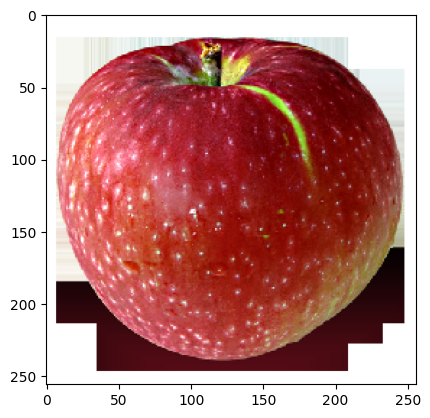

 
1/1 [==============================] - 0s 347ms/step
Fresh Apple
 
Image hex_code palette:
   hex_code total_pixels
0   #890C04        30219
1   #BF4745        15825
2   #991926        13317
3   #5D0000        12445
4   #520B14        10036
5   #BF5D62         5151
6   #E0636A         4829
7   #935B3E         4109
8   #A22F44         3603
9   #DF4F4B         3305
10  #36070D         2997
 
Classification from Hexcode:
Rotten


In [7]:
testing_models(apple, img_model, pix_model2)